In [38]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats 

In [39]:
# psi_0 = qt.basis(2,0)
# psi_1 = qt.basis(2,1)
# x = (psi_0 + psi_1).unit()
# phase = (psi_0 + np.exp(1j*np.pi/4)*psi_1).unit()

# b = qt.Bloch()
# b.add_states(x)
# b.add_states(phase)
# b.show()

# Problem 1

## a

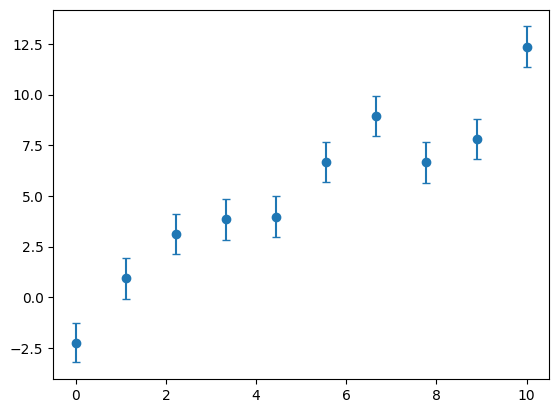

In [40]:
slope = 1
offset = 0.25
time = np.linspace(0,10,10)
data = np.random.normal(slope*time + offset, 1)
sigma = 1*np.random.normal(np.ones(len(data)),0.01)
plt.errorbar(time, data, sigma, fmt = 'o', capsize=3)
plt.show()


## b

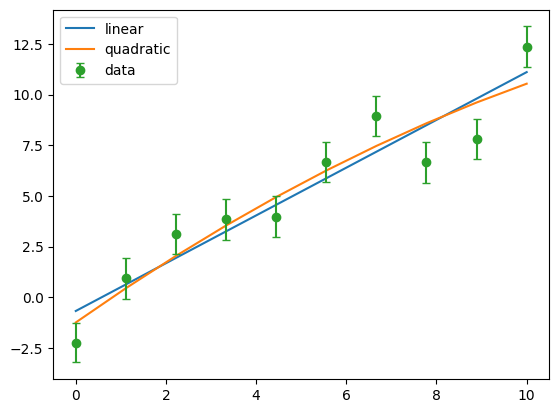

In [41]:
def linear_fit(time, a, b):
    return b*time + a

def quadratic_fit(time, a, b, c):
    return a + b*time + c*time**2

initial_guesses = [1, 0.9]

popt, pcov = curve_fit(linear_fit, xdata = time, ydata=data, sigma=sigma, p0=initial_guesses)
expected_linear = popt[1]*time+popt[0]
plt.plot(time, expected_linear, label = 'linear')

popt, pcov = curve_fit(quadratic_fit, xdata = time, ydata=data, sigma=sigma)
expected_quadratic = popt[2]*time**2+popt[1]*time+popt[0]
plt.plot(time, expected_quadratic, label = 'quadratic')
plt.errorbar(time, data, sigma, fmt = 'o', capsize=3, label = 'data')
plt.legend()
plt.show()

In [42]:
xi_linear = np.sum((expected_linear-data)**2/expected_linear**2)
xi_quadratic = np.sum((expected_quadratic-data)**2/expected_linear**2)
N = int(time.size)
print('linear ratio: ', xi_linear/(N-2))
print('quadratic ratio: ', xi_quadratic/(N-3))

linear ratio:  0.7661754006748507
quadratic ratio:  0.46754767589870816


# Problem 3

## Part a)

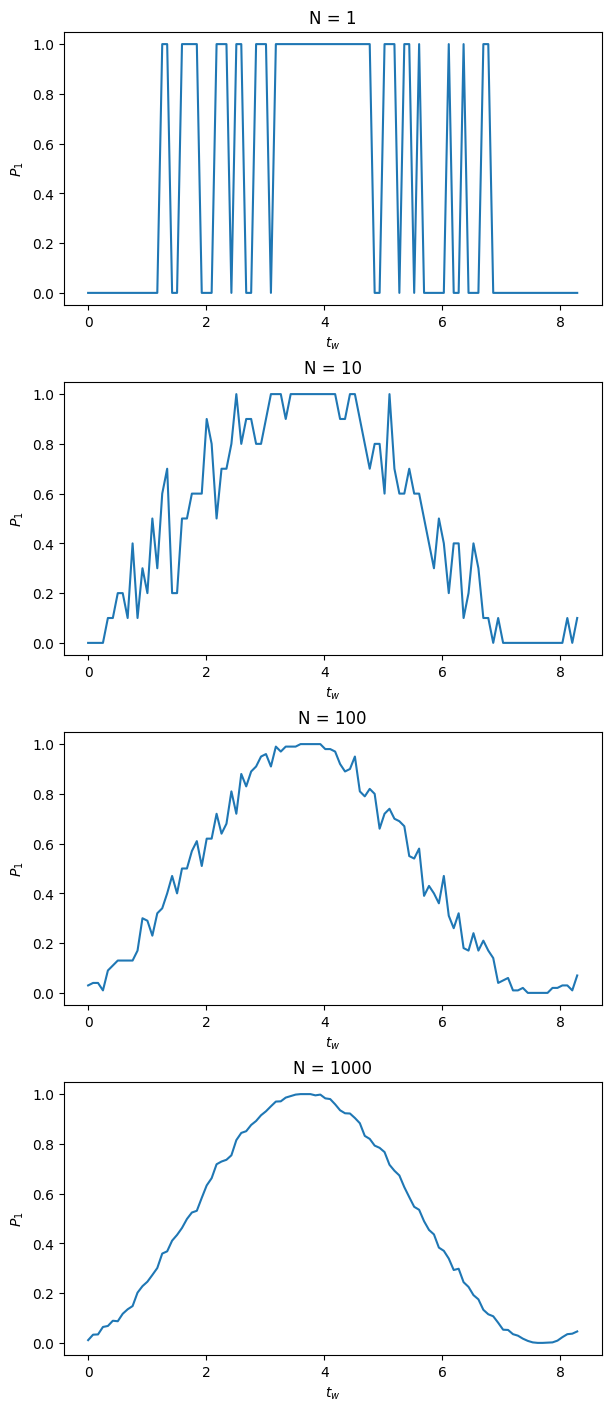

In [43]:

tw = np.linspace(0,np.pi*2+2,100)   
def calculate_p1(tw, omega=2*np.pi, delta=np.pi/4):
    omega_prime = np.sqrt(omega**2 + delta**2)
    tp = (np.pi/2) / omega
    P1 = 1 - (omega**2 / omega_prime**4) * ((omega_prime * np.cos(delta * tw / 2) * np.sin(omega_prime * tp)) - 2 * delta * np.sin(delta * tw / 2) * np.sin(omega_prime * tp / 2)**2)**2
    return P1

def P1_trail(tw, N):
    P1 = calculate_p1(tw)
    P1_measured = []
    for i in range(P1.size):
        trials = np.random.binomial(1, P1[i], N)
        P1_measured.append(np.sum(trials)/N)
    return np.array(P1_measured)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(6, 14), constrained_layout=True)
N = [1, 10, 100, 1000]
for i in range(4):
    ax[i].plot(tw, P1_trail(tw, N[i]))
    ax[i].set_xlabel(r'$t_w$')
    ax[i].set_ylabel(r'$P_1$')
    ax[i].set_title('N = ' + str(N[i]))
plt.show()

# Part b)

In [44]:
def find_closest_index(arr, threshold, start_idx=0, end_idx=None):
    """
    Find the index of the element in the array that is closest to the threshold value
    within the specified index range.

    Parameters:
    arr (numpy.ndarray): Input numpy array.
    threshold (float): Threshold value.
    start_idx (int, optional): Start index for search. Default is 0.
    end_idx (int, optional): End index for search. Default is None (end of array).

    Returns:
    int: Index of the closest element to the threshold value.
    """
    if end_idx is None:
        end_idx = len(arr)

    # Slice the array to specified index range
    sub_arr = arr[start_idx:end_idx]

    # Find index of closest element to the threshold value
    idx_closest = np.abs(sub_arr - threshold).argmin()

    # Adjust index to the original array
    idx_closest += start_idx

    return idx_closest

N = [1, 10, 100, 1000]
for i in range(4):
    measured_P1 = P1_trail(tw, N[i])
    half_point = find_closest_index(measured_P1, 0.5, 10, 30)
    print('0.5 point for N = ', str(N[i]) , ' :',half_point)

0.5 point for N =  1  : 10
0.5 point for N =  10  : 17
0.5 point for N =  100  : 20
0.5 point for N =  1000  : 20
